In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./data/monthly-beer-production-in-austr.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [3]:
df.rename(columns={"IPG2211A2N": "Monthly_Beer_Production", "DATE": "Date"}, inplace=True)
df.head()

,Date,Monthly_Beer_Production
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     397 non-null    object 
 1   Monthly_Beer_Production  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [5]:
df.Date = pd.to_datetime(df.Date)

df = df.set_index("Date")
df.head()

,Monthly_Beer_Production
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


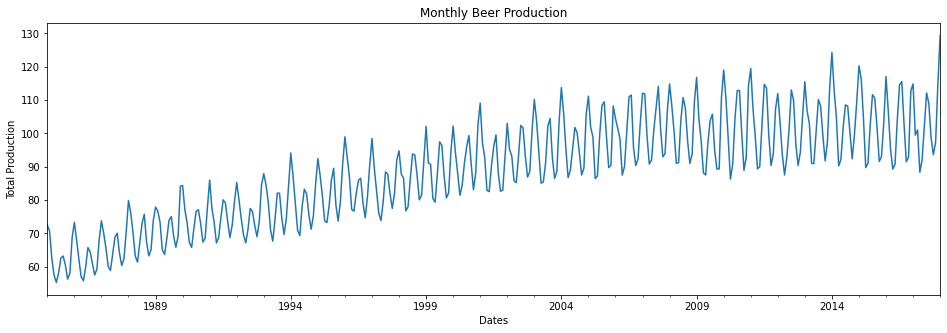

In [6]:
df.index.freq = 'MS'

ax = df['Monthly_Beer_Production'].plot(figsize = (16,5), title = "Monthly Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production');

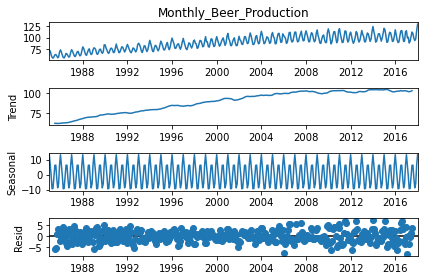

In [7]:
a = seasonal_decompose(df["Monthly_Beer_Production"], model = "add")
a.plot();

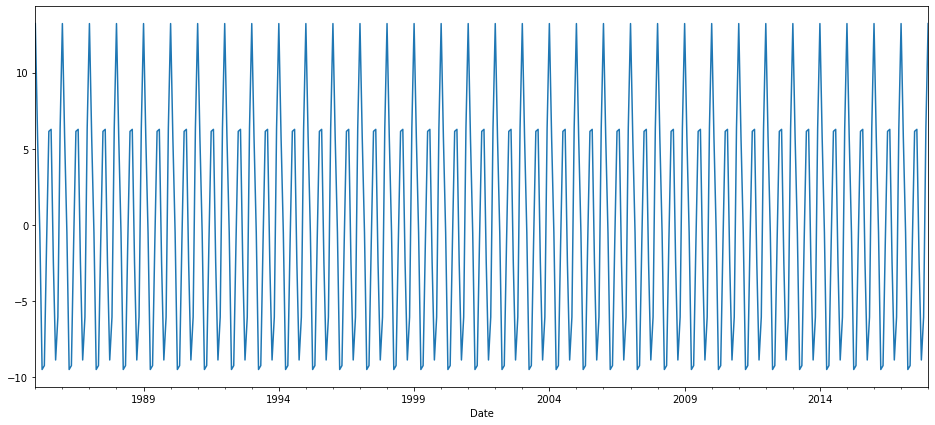

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,7))
a.seasonal.plot();

### ARIMA Forecast

In [9]:
auto_arima(df['Monthly_Beer_Production'], seasonal=True, m=12, 
           max_p=7, max_d=5, max_q=7, max_P=4, max_D=4, max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                           
=====================================================================================================
Dep. Variable:                                             y   No. Observations:                  397
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2, 3, 4], 12)   Log Likelihood                -916.878
Date:                                       Fri, 05 Aug 2022   AIC                           1849.756
Time:                                               01:37:53   BIC                           1881.607
Sample:                                                    0   HQIC                          1862.375
                                                       - 397                                         
Covariance Type:                                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5041      0.047     10.834      0.000       0.413       0.595
ma.L1         -0.9549      0.018    -54.217      0.000      -0.989      -0.920
ar.S.L12       0.9935      0.005    219.880      0.000       0.985       1.002
ma.S.L12      -0.7341      0.045    -16.148      0.000      -0.823      -0.645
ma.S.L24      -0.2043      0.055     -3.748      0.000      -0.311      -0.097
ma.S.L36       0.1639      0.071      2.313      0.021       0.025       0.303
ma.S.L48       0.1095      0.052      2.105      0.035       0.008       0.212
sigma2         5.4297      0.314     17.303      0.000       4.815       6.045
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                23.23
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               2.84   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

arima_model = SARIMAX(train_data['Monthly_Beer_Production'], 
                      order = (1,1,1), 
                      seasonal_order = (1, 0, [1, 2, 3, 4], 12))

arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                           
=====================================================================================================
Dep. Variable:                       Monthly_Beer_Production   No. Observations:                  385
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2, 3, 4], 12)   Log Likelihood                -876.949
Date:                                       Fri, 05 Aug 2022   AIC                           1769.898
Time:                                               01:44:25   BIC                           1801.503
Sample:                                           01-01-1985   HQIC                          1782.434
                                                - 01-01-2017                                         
Covariance Type:                                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5049      0.050     10.106      0.000       0.407       0.603
ma.L1         -0.9529      0.018    -53.509      0.000      -0.988      -0.918
ar.S.L12       0.9945      0.004    237.317      0.000       0.986       1.003
ma.S.L12      -0.7037      0.048    -14.594      0.000      -0.798      -0.609
ma.S.L24      -0.2165      0.063     -3.444      0.001      -0.340      -0.093
ma.S.L36       0.1357      0.068      1.983      0.047       0.002       0.270
ma.S.L48       0.0917      0.050      1.850      0.064      -0.005       0.189
sigma2         5.0954      0.334     15.278      0.000       4.442       5.749
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                10.08
Prob(Q):                              0.59   Prob(JB):                         0.01
Heteroskedasticity (H):               2.62   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
arima_pred = arima_result.predict(start = len(train_data), 
                                  end = len(df)-1, 
                                  typ="levels").rename("ARIMA Predictions")
arima_pred

2017-02-01    106.382616
2017-03-01     98.585883
2017-04-01     89.687994
2017-05-01     91.713796
2017-06-01    102.927294
2017-07-01    112.514359
2017-08-01    111.799312
2017-09-01    100.674523
2017-10-01     91.924393
2017-11-01     95.938603
2017-12-01    111.328835
2018-01-01    118.331924
Freq: MS, Name: ARIMA Predictions, dtype: float64

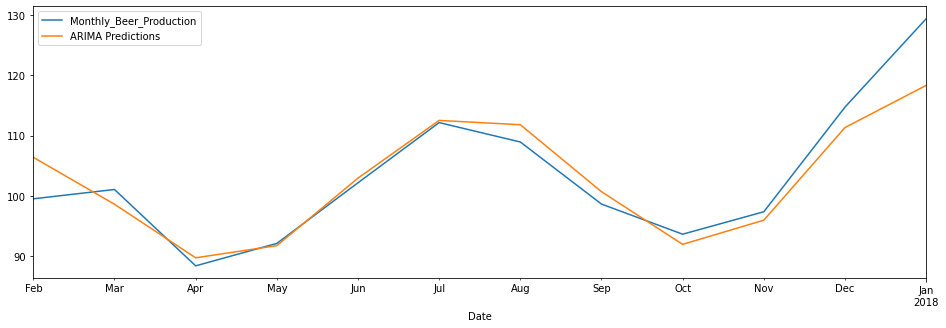

In [12]:
test_data['Monthly_Beer_Production'].plot(figsize = (16,5), legend=True)

arima_pred.plot(legend = True);

In [13]:
arima_rmse_error = rmse(test_data['Monthly_Beer_Production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly_Beer_Production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 17.296864146630263
RMSE Error: 4.158949885082803
Mean: 88.84721763224181


In [14]:
test_data['ARIMA_Predictions'] = arima_pred

### LSTM Forecast

In [15]:
# First we’ll scale our train and test data with MinMaxScaler.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train_data)

scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [16]:
# Before creating LSTM model we should create a Time Series Generator object.

from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [17]:
lstm_model.fit_generator(generator, epochs=20)

Epoch 1/20
373/373 [==============================] - 2s 3ms/step - loss: 0.0196
Epoch 2/20
373/373 [==============================] - 1s 3ms/step - loss: 0.0118
Epoch 3/20
373/373 [==============================] - 1s 3ms/step - loss: 0.0078
Epoch 4/20
373/373 [==============================] - 1s 3ms/step - loss: 0.0059
Epoch 5/20
373/373 [==============================] - 1s 3ms/step - loss: 0.0041
Epoch 6/20
373/373 [==============================] - 1s 3ms/step - loss: 0.0041
Epoch 7/20
373/373 [==============================] - 1s 3ms/step - loss: 0.0035
Epoch 8/20
373/373 [==============================] - 1s 3ms/step - loss: 0.0038
Epoch 9/20
373/373 [==============================] - 1s 3ms/step - loss: 0.0033
Epoch 10/20
373/373 [==============================] - 1s 3ms/step - loss: 0.0027
Epoch 11/20
373/373 [==============================] - 1s 3ms/step - loss: 0.0028
Epoch 12/20
373/373 [==============================] - 1s 3ms/step - loss: 0.0031
Epoch 13/20
373/373 [====

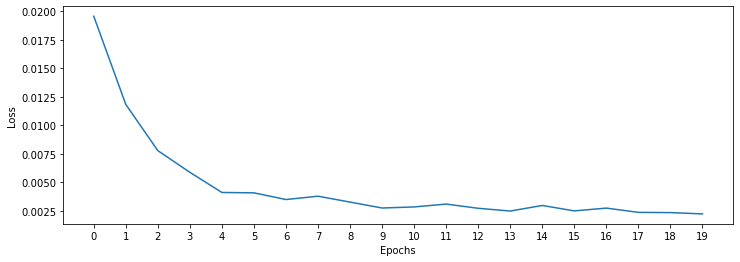

In [18]:
losses_lstm = lstm_model.history.history['loss']

plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [19]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [20]:
lstm_predictions_scaled

[array([0.6787436], dtype=float32),
 array([0.52063346], dtype=float32),
 array([0.440352], dtype=float32),
 array([0.46150672], dtype=float32),
 array([0.63584876], dtype=float32),
 array([0.7734047], dtype=float32),
 array([0.7766458], dtype=float32),
 array([0.6379256], dtype=float32),
 array([0.48685047], dtype=float32),
 array([0.49899665], dtype=float32),
 array([0.72145784], dtype=float32),
 array([0.78372395], dtype=float32)]

In [21]:
# we scaled our data that’s why we have to inverse it to see true predictions.

lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[102.10754809],
       [ 91.20746654],
       [ 85.67287832],
       [ 87.13128128],
       [ 99.15038639],
       [108.63346654],
       [108.85690472],
       [ 99.29356499],
       [ 88.87847405],
       [ 89.71582892],
       [105.05225913],
       [109.34487239]])

In [22]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

,Monthly_Beer_Production,ARIMA_Predictions,LSTM_Predictions
Date,,,
2017-02-01,99.4901,106.382616,102.107548
2017-03-01,101.0396,98.585883,91.207467
2017-04-01,88.3530,89.687994,85.672878
2017-05-01,92.0805,91.713796,87.131281
2017-06-01,102.1532,102.927294,99.150386
2017-07-01,112.1538,112.514359,108.633467
2017-08-01,108.9312,111.799312,108.856905
2017-09-01,98.6154,100.674523,99.293565
2017-10-01,93.6137,91.924393,88.878474


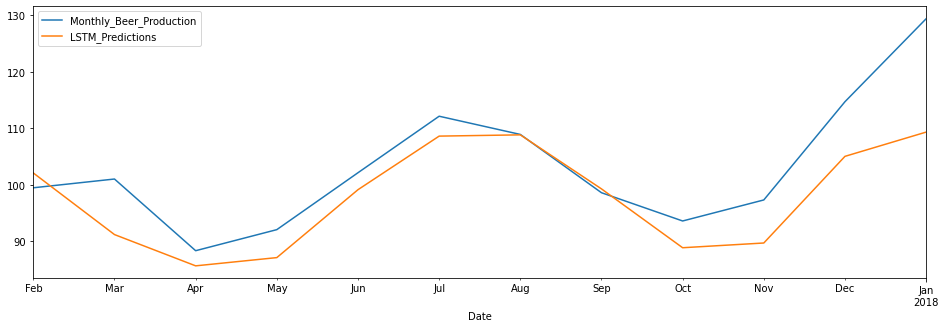

In [23]:
test_data['Monthly_Beer_Production'].plot(figsize = (16,5), legend=True)

test_data['LSTM_Predictions'].plot(legend = True);

In [24]:
lstm_rmse_error = rmse(test_data['Monthly_Beer_Production'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Monthly_Beer_Production'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 61.12097724639297
RMSE Error: 7.817990614370995
Mean: 88.84721763224181


### Prophet Forecast

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly_Beer_Production  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [26]:
df_pr = df.copy()
df_pr = df.reset_index()

df_pr.columns = ['ds','y'] # To use prophet column names should be like that

train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

from prophet import Prophet

m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

prophet_pred.tail()

01:46:08 - cmdstanpy - INFO - Chain [1] start processing
01:46:08 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
392,2017-09-01,103.642700,97.271640,104.284020,103.625797,103.662574,-2.747418,-2.747418,-2.747418,-2.747418,-2.747418,-2.747418,0.0,0.0,0.0,100.895283
393,2017-10-01,103.665576,90.657867,98.201542,103.643270,103.689701,-9.107406,-9.107406,-9.107406,-9.107406,-9.107406,-9.107406,0.0,0.0,0.0,94.558170
394,2017-11-01,103.689214,93.992305,100.838447,103.659335,103.719845,-6.259865,-6.259865,-6.259865,-6.259865,-6.259865,-6.259865,0.0,0.0,0.0,97.429350
395,2017-12-01,103.712090,106.860480,114.053277,103.676262,103.749856,6.472893,6.472893,6.472893,6.472893,6.472893,6.472893,0.0,0.0,0.0,110.184983
396,2018-01-01,103.735728,112.945967,119.760752,103.692525,103.782528,12.766377,12.766377,12.766377,12.766377,12.766377,12.766377,0.0,0.0,0.0,116.502106


In [27]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

prophet_pred = prophet_pred.set_index("Date")

prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
2017-02-01,108.856419
2017-03-01,102.695607
2017-04-01,94.268794
2017-05-01,94.394452
2017-06-01,102.200869
2017-07-01,109.392793
2017-08-01,109.478956
2017-09-01,100.895283
2017-10-01,94.558170


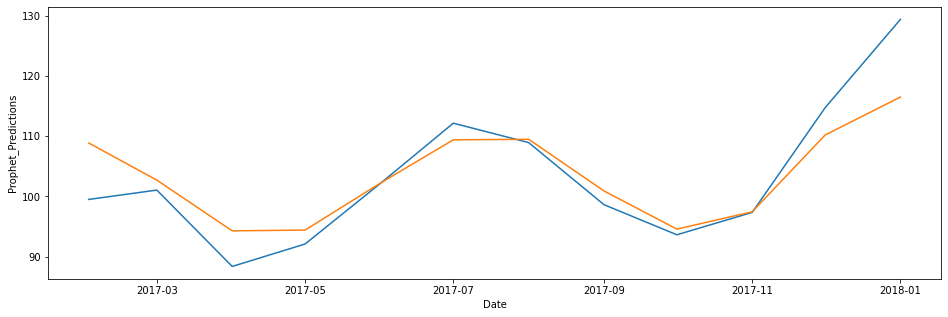

In [28]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

import seaborn as sns

plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly_Beer_Production"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [29]:
prophet_rmse_error = rmse(test_data['Monthly_Beer_Production'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly_Beer_Production'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 27.65851382909674
RMSE Error: 5.25913622461871
Mean: 88.84721763224181


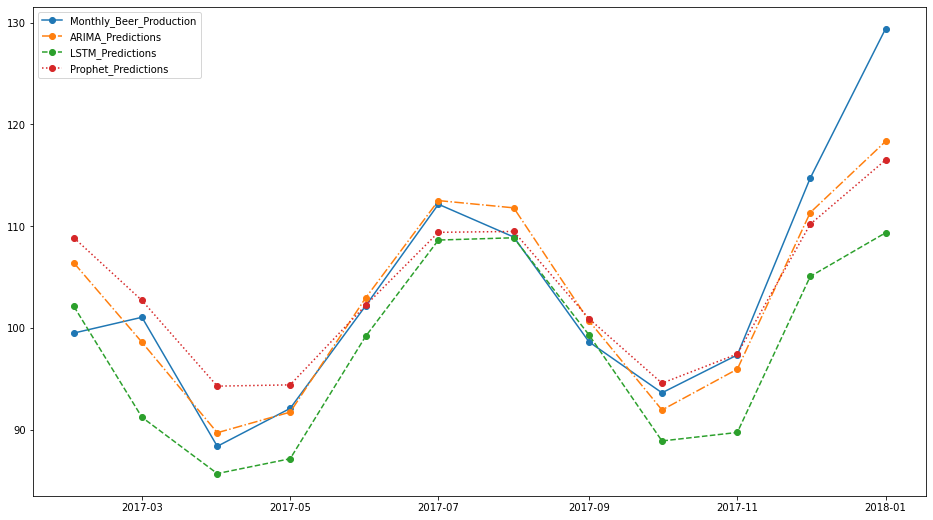

In [30]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"], "RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly_Beer_Production"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend(['Monthly_Beer_Production', 'ARIMA_Predictions', 'LSTM_Predictions', 'Prophet_Predictions'])
plt.show();

In [31]:
print(f"Mean: {test_data['Monthly_Beer_Production'].mean()}")
errors

Mean: 103.15770000000002


,Models,RMSE Errors,MSE Errors
0,ARIMA,4.158950,17.296864
1,LSTM,7.817991,61.120977
2,Prophet,5.259136,27.658514


In [32]:
test_data

,Monthly_Beer_Production,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
Date,,,,
2017-02-01,99.4901,106.382616,102.107548,108.856419
2017-03-01,101.0396,98.585883,91.207467,102.695607
2017-04-01,88.3530,89.687994,85.672878,94.268794
2017-05-01,92.0805,91.713796,87.131281,94.394452
2017-06-01,102.1532,102.927294,99.150386,102.200869
2017-07-01,112.1538,112.514359,108.633467,109.392793
2017-08-01,108.9312,111.799312,108.856905,109.478956
2017-09-01,98.6154,100.674523,99.293565,100.895283
2017-10-01,93.6137,91.924393,88.878474,94.558170
